In [1]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir('..')

In [2]:
ttrs_dataset = pd.read_csv('data/processed/TTRS_dataset/data/tinkoff_raw_data_anonymized.csv')
ttrs_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14287287 entries, 0 to 14287286
Data columns (total 8 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   party_rk                   int64 
 1   financial_account_type_cd  int64 
 2   transaction_type_desc      int64 
 3   merchant_type              int64 
 4   merchant_group_rk          int64 
 5   category                   int64 
 6   transaction_dttm           object
 7   transaction_amt            int64 
dtypes: int64(7), object(1)
memory usage: 872.0+ MB


In [3]:
ttrs_dataset.head()

,party_rk,financial_account_type_cd,transaction_type_desc,merchant_type,merchant_group_rk,category,transaction_dttm,transaction_amt
0,1,1,1,1,0,1,2019-01-01,84
1,2,1,1,2,2,2,2019-01-01,410
2,3,2,1,3,0,3,2019-01-01,701
3,4,2,1,4,3,4,2019-01-01,6203
4,5,2,1,5,4,3,2019-01-01,734


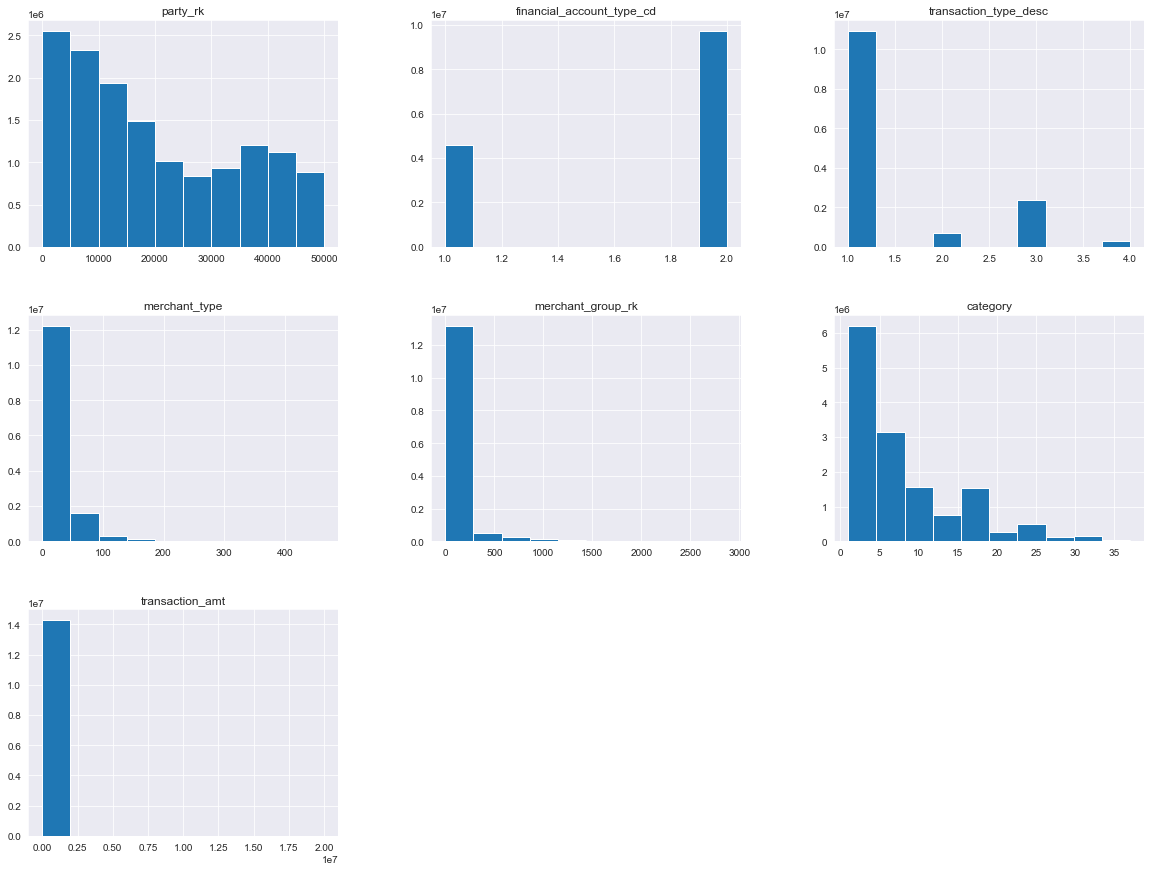

In [4]:
ttrs_dataset.hist(figsize=(20,15));

Пропущенных значений нет

In [5]:
ttrs_dataset.isnull().sum(axis=0)

party_rk                     0
financial_account_type_cd    0
transaction_type_desc        0
merchant_type                0
merchant_group_rk            0
category                     0
transaction_dttm             0
transaction_amt              0
dtype: int64

Матрица корреляций

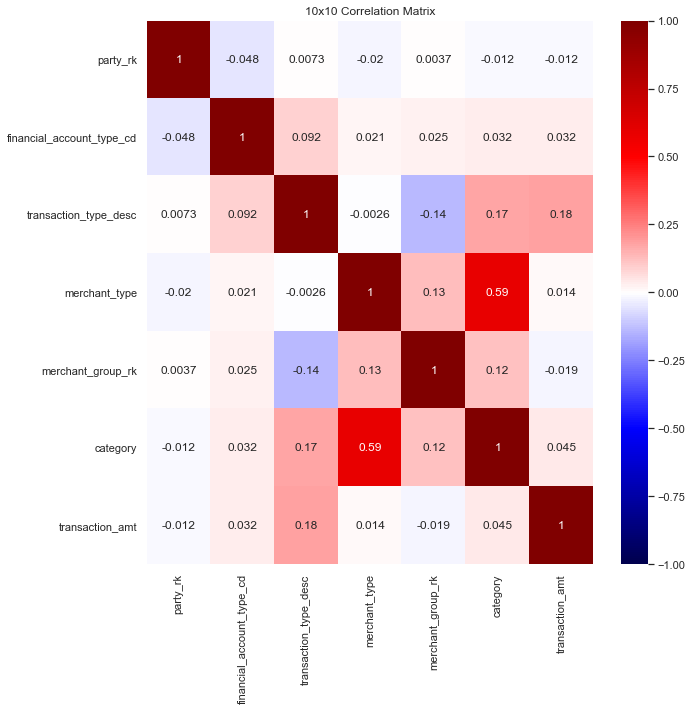

In [6]:
corr_matrix = ttrs_dataset.corr()

sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='seismic', vmin=-1, vmax=1, ax=ax)

# set the axis labels and title
ax.set_title('10x10 Correlation Matrix')

# display the plot
plt.show()

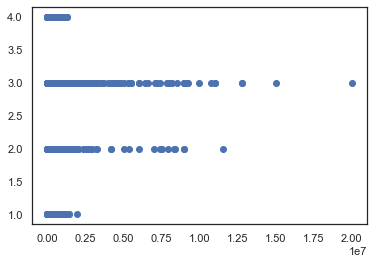

In [7]:
plt.rcParams['agg.path.chunksize'] = 10000

plt.scatter(ttrs_dataset['transaction_amt'], ttrs_dataset['transaction_type_desc'])

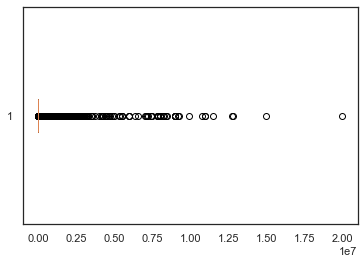

In [8]:
plt.boxplot(ttrs_dataset['transaction_amt'], vert=False);

In [9]:
print(
    f"Number of unique users {ttrs_dataset['party_rk'].nunique()}\n"
    f"Number of unique items {ttrs_dataset['merchant_group_rk'].nunique()}"
)

Number of unique users 50000
Number of unique items 2874


Создание таблицы user_x_items

In [33]:
from src.data.ttrs_utils import create_user_x_items

create_user_x_items(ttrs_dataset)

category                                                    \
merchant_group_rk     0    2     3     4     5    6    7    8     9     10     
party_rk                                                                       
1                    592.0  2.0   NaN  59.0   2.0  6.0  NaN  NaN   NaN  17.0   
2                    454.0  5.0   NaN   NaN   3.0  NaN  NaN  NaN   NaN   NaN   
3                    649.0  NaN   NaN   6.0   4.0  NaN  NaN  NaN   NaN  24.0   
4                    354.0  4.0  10.0   9.0  34.0  NaN  NaN  NaN  42.0   1.0   
5                    364.0  NaN   NaN  75.0   6.0  NaN  NaN  NaN   NaN   NaN   
...                    ...  ...   ...   ...   ...  ...  ...  ...   ...   ...   
49996                133.0  NaN   4.0   6.0   4.0  NaN  NaN  NaN   NaN   6.0   
49997                100.0  NaN   1.0   NaN   1.0  NaN  NaN  NaN   2.0   NaN   
49998                 40.0  NaN   NaN  15.0   9.0  NaN  NaN  NaN   NaN   4.0   
49999                 74.0  NaN   NaN   4.0   1.0  NaN  NaN  NaN   NaN   NaN   
50000                166.0  1.0   NaN  21.0   2.0  NaN  NaN  NaN   NaN   3.0   

                   ... transaction_type_desc                                \
merchant_group_rk  ...                  2865 2866 2867 2868 2869 2870 2871   
party_rk           ...                                                       
1                  ...                   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2                  ...                   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3                  ...                   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4                  ...                   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5                  ...                   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...                ...                   ...  ...  ...  ...  ...  ...  ...   
49996              ...                   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
49997              ...                   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
49998              ...                   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
49999              ...                   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
50000              ...                   NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                                  
merchant_group_rk 2872 2873 2874  
party_rk                          
1                  NaN  NaN  NaN  
2                  NaN  NaN  NaN  
3                  NaN  NaN  NaN  
4                  NaN  NaN  NaN  
5                  NaN  NaN  NaN  
...                ...  ...  ...  
49996              NaN  NaN  NaN  
49997              NaN  NaN  NaN  
49998              NaN  NaN  NaN  
49999              NaN  NaN  NaN  
50000              NaN  NaN  NaN  

[50000 rows x 17244 columns]

Разделение датасета по времени

In [27]:
from  datetime import datetime, timedelta
pd.to_datetime(ttrs_dataset['transaction_dttm']).describe(datetime_is_numeric=True)


count                         14287287
mean     2019-08-21 10:25:00.850090496
min                2019-01-01 00:00:00
25%                2019-05-17 00:00:00
50%                2019-08-30 00:00:00
75%                2019-12-02 00:00:00
max                2020-02-29 00:00:00
Name: transaction_dttm, dtype: object

In [5]:
last_month = pd.to_datetime(ttrs_dataset['transaction_dttm'].max()) - timedelta(days=30)

ttrs_dataset_last_month = ttrs_dataset[pd.to_datetime(ttrs_dataset['transaction_dttm']) >= last_month]
ttrs_dataset_historical = ttrs_dataset[pd.to_datetime(ttrs_dataset['transaction_dttm']) < last_month]
ttrs_dataset_last_month

,party_rk,financial_account_type_cd,transaction_type_desc,merchant_type,merchant_group_rk,category,transaction_dttm,transaction_amt
12097056,47143,2,1,11,185,9,2020-01-30,317
12097057,13039,2,1,5,5,3,2020-01-30,300
12097058,36701,2,1,5,162,3,2020-01-30,344
12097059,4610,2,3,53,53,16,2020-01-30,14100
12097060,3013,2,3,13,0,7,2020-01-30,20100
...,...,...,...,...,...,...,...,...
14287282,39896,1,1,5,62,3,2020-02-29,161
14287283,40676,2,3,53,71,16,2020-02-29,81
14287284,42373,2,3,53,71,16,2020-02-29,1026
14287285,47895,2,1,2,1072,2,2020-02-29,378


Считаем precision и recall для датафрейма с операциями за последний месяц

In [8]:
import numpy as np

from src.data.ttrs_utils import create_user_x_items
from src.metrics.precision_recall import precision_recall_at_k

user_x_items_last_month = create_user_x_items(ttrs_dataset_last_month)

for k in [5, 10, 50]:
    precisions, recalls = precision_recall_at_k(user_x_items_last_month, user_x_items_last_month, k=k)

    mean_precisions = np.mean(list(precisions.values()))
    mean_recalls = np.mean(list(recalls.values()))
    print(f"Mean precision@{k} over users: {mean_precisions}. Mean recall@{k} over users: {mean_recalls}")

Mean precision@5 over users: 1.0. Mean recall@5 over users: 0.7837917978596474
Mean precision@10 over users: 1.0. Mean recall@10 over users: 0.9248087710339746
Mean precision@50 over users: 1.0. Mean recall@50 over users: 1.0


In [80]:
from itertools import product

class TopPopularModel:
    def __init__(self, k=10):
        self._k = k
        self._most_popular_k = None

    def fit(self, data):
        self._most_popular_k = data['items'].value_counts().nlargest(self._k)
        self._most_popular_k = list(self._most_popular_k.index)

    def predict(self, data):
        return pd.DataFrame(list(product(data, self._most_popular_k)), columns=['users', 'items'])



class TopPersonalModel:
    def __init__(self, k=10):
        self._k = k
        self._most_popular_k = {}


    def fit(self, data):
        for user_id, user_items_gt in data.groupby('user')['items']:
            self._most_popular_k[user_id] = user_items_gt.value_counts().nlargest(self._k)

    def predict(self, data):
        result = pd.DataFrame()
        for user_id in data:
            top_personal = self._most_popular_k[user_id]

            result.append(pd.DataFrame(list(product(user_id, top_personal)), columns=['user', 'items']))

        return result



In [74]:
top_model = TopPopularModel(k=100)
top_model.fit(create_user_x_items(ttrs_dataset_historical))

users_for_predictions = user_x_items_last_month['users'].unique()
prediction_top_k = top_model.predict(users_for_predictions)
prediction_top_k

,user,items
0,1,0
1,1,4
2,1,5
3,1,16
4,1,55
...,...,...
4136095,50000,18
4136096,50000,44
4136097,50000,106
4136098,50000,345


Метрики для топ-10 модели

In [75]:
user_x_items_last_month = create_user_x_items(ttrs_dataset_last_month)

for k in [10, 20, 50]:
    precisions, recalls = precision_recall_at_k(
        predictions=prediction_top_k,
        ground_truth=user_x_items_last_month,
        k=k
    )

    mean_precisions = np.mean(list(precisions.values()))
    mean_recalls = np.mean(list(recalls.values()))
    print(f"Mean precision@{k} over users: {mean_precisions}. Mean recall@{k} over users: {mean_recalls}")

Mean precision@5 over users: 0.3571432025337879. Mean recall@5 over users: 0.4593011533189958
Mean precision@10 over users: 0.23466550615313944. Mean recall@10 over users: 0.5639099185334179
Mean precision@50 over users: 0.08110393849278306. Mean recall@50 over users: 0.7470250221088063


In [82]:
from src.data.ttrs_utils import create_user_x_items

top_model = TopPersonalModel(k=10)
top_model.fit(create_user_x_items(ttrs_dataset_historical))

users_for_predictions = user_x_items_last_month['user'].unique()
prediction_top_k = top_model.predict(users_for_predictions)
prediction_top_k

KeyboardInterrupt: 